In [26]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



In [42]:
%autoreload 2
from src import ODE_euler
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# Ejemplo de función diferencial
def f(t, y):
    return  -5*y + 5*t**2 +2*t
    
# Parámetros para resolver la ODE
a = 0
b = 1
y_t0 = 1/3
N = 10

# Llamar al método de Euler
ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

print("Valores aproximados de y:", ys)
print("Puntos de la malla (t):", ts)
print("Tamaño de paso h:", h)

Valores aproximados de y: [0.3333333333333333, 0.16666666666666666, 0.10833333333333334, 0.11416666666666667, 0.16208333333333336, 0.2410416666666667, 0.34552083333333333, 0.4727604166666667, 0.6213802083333333, 0.7906901041666666, 0.9803450520833332]
Puntos de la malla (t): [0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
Tamaño de paso h: 0.1


## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



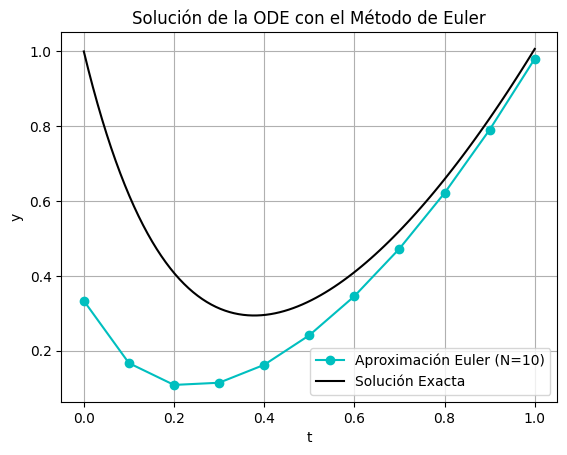

In [44]:
def exact_solution(t):
    return (t)**2 + (1 * np.exp(-5*t))

# Valores exactos para la misma malla de puntos
t_exact = np.linspace(a, b, 100)  # Más puntos para una línea suave
y_exact = exact_solution(t_exact)

# Graficar resultados 
plt.plot(ts, ys, 'co-', label="Aproximación Euler (N=10)")  # Color cambiado a cian
plt.plot(t_exact, y_exact, 'k-', label="Solución Exacta")  # Color cambiado a negro
plt.xlabel("t")
plt.ylabel("y")
plt.title("Solución de la ODE con el Método de Euler")
plt.legend()
plt.grid()
plt.show()

# Errores
Calcule el eeror relativo para diferentes valores de N.

In [30]:
# Calcular error relativo

N1 = 5
N2 = 20

ys_N1, ts_N1, h_N1 = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N1)

ys_N2, ts_N2, h_N2 = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N2)


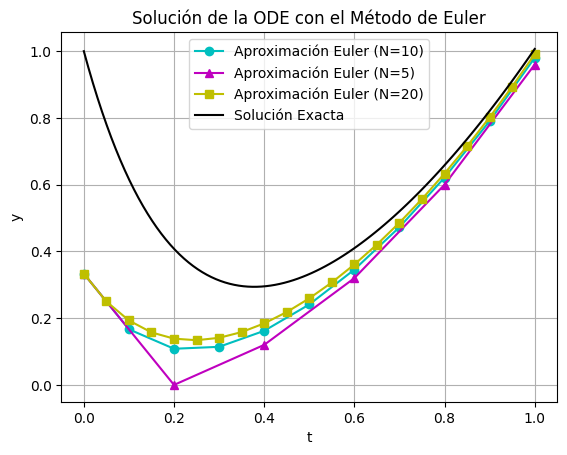

In [35]:
plt.plot(ts, ys, 'co-', label="Aproximación Euler (N=10)")  # Color cambiado a cian
plt.plot(ts_N1, ys_N1, 'm^-', label="Aproximación Euler (N=5)")  # Color cambiado a magenta
plt.plot(ts_N2, ys_N2, 'ys-', label="Aproximación Euler (N=20)")  # Color cambiado a amarillo
plt.plot(t_exact, y_exact, 'k-', label="Solución Exacta")  # Color cambiado a negro
plt.xlabel("t")
plt.ylabel("y")
plt.title("Solución de la ODE con el Método de Euler")
plt.legend()
plt.grid()
plt.show()

In [36]:
ys_N1, ts_N1, h_N1 = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N1)
ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)
ys_N2, ts_N2, h_N2 = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N2)

# Calcular el error relativo promedio
def relative_error_average(ys, ts, exact_solution_func):
    y_exact_at_ts = exact_solution_func(ts)
    relative_errors = np.abs((ys - y_exact_at_ts) / y_exact_at_ts)
    return np.mean(relative_errors)

# Calcular los errores relativos promedio para N=5, N=10 y N=20
e_N5 = relative_error_average(ys_N1, ts_N1, exact_solution)
e_N10 = relative_error_average(ys, ts, exact_solution)
e_N20 = relative_error_average(ys_N2, ts_N2, exact_solution)

# Mostrar los resultados
e_N5, e_N10, e_N20


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [49]:
# Reescribiendo el cálculo de errores relativos promedio
import numpy as np

# Ejemplo de función diferencial
def f(t, y):
    return -5*y + 5*t**2 +2*t


# Parámetros para resolver la ODE
a, b, y_t0 = 0, 1, 1/3

# Solución exacta
def exact_solution(t):
    return (t)**2 + (1 * np.exp(-5*t))

# Resolver con N=5, N=10, y N=20
ys_N1, ts_N1, h_N1 = ODE_euler(a, b, f, y_t0, 5)
ys, ts, h = ODE_euler(a, b, f, y_t0, 10)
ys_N2, ts_N2, h_N2 = ODE_euler(a, b, f, y_t0, 20)

# Calcular el error relativo promedio
def relative_error_average(ys, ts, exact_solution_func):
    y_exact_at_ts = exact_solution_func(ts)
    relative_errors = np.abs((ys - y_exact_at_ts) / y_exact_at_ts)
    return np.mean(relative_errors)

# Calcular los errores relativos promedio para N=5, N=10 y N=20
e_N5 = relative_error_average(ys_N1, ts_N1, exact_solution)
e_N10 = relative_error_average(ys, ts, exact_solution)
e_N20 = relative_error_average(ys_N2, ts_N2, exact_solution)

# Mostrar los resultados
e_N5, e_N10, e_N20


(np.float64(0.43574394739605354),
 np.float64(0.3508063402029961),
 np.float64(0.30961989685744823))